#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [35]:
## Reading the image plaksha_Faculty.jpg

img = cv2.imread(r"C:\Users\reshm\Downloads\Plaksha_Faculty.jpg")

## Convert the image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "Face"  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread(r"C:\Users\reshm\Downloads\Plaksha_Faculty.jpg")

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Face detection
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Text settings
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0,0,255)
font_thickness = 1

for (x,y,w,h) in faces_rect:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.putText(img,text,(x,y-5),font,font_scale,font_color,font_thickness)

cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\reshm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


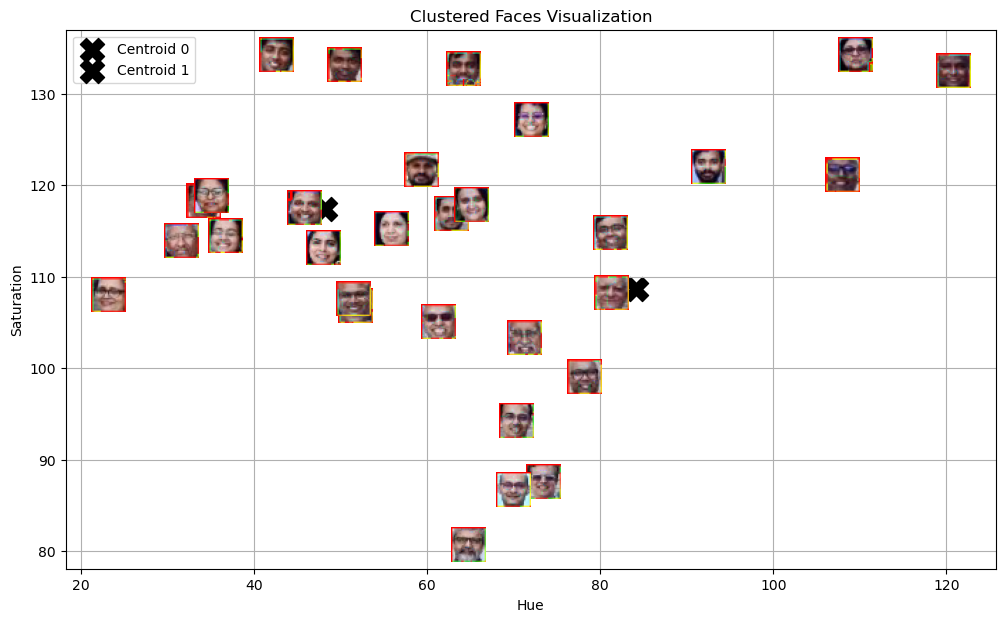

In [43]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []

# Extract features
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y+h, x:x+w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append([hue, saturation])
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(hue_saturation)
centroids = kmeans.cluster_centers_

# Colors for clusters
colors = ['red', 'blue']

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

for i in range(len(face_images)):
    x, y = hue_saturation[i]
    
    # Plot thumbnail
    im = OffsetImage(
        cv2.cvtColor(cv2.resize(face_images[i], (25, 25)), cv2.COLOR_HSV2RGB),
        zoom=1
    )
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax.add_artist(ab)
    
    # Plot point with cluster color
    ax.scatter(x, y, color=colors[labels[i]], s=80)

# Plot centroids
for i, c in enumerate(centroids):
    ax.scatter(c[0], c[1], marker='X', s=300, color='black', label=f'Centroid {i}')

ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_title("Clustered Faces Visualization")
ax.legend()
ax.grid(True)

plt.show()

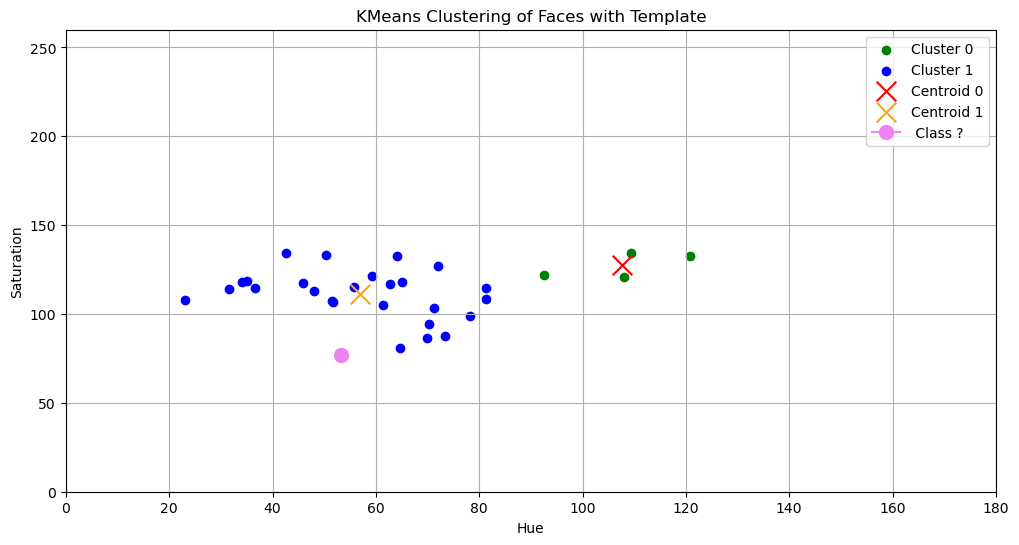

In [38]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],color='green', label='Cluster 0')


# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1],marker='x', s=200, color='red', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1],marker='x', s=200, color='orange', label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("KMeans Clustering of Faces with Template")
plt.legend()
plt.grid(True)

plt.xlim(0, 180)
plt.ylim(0, 260)

plt.show()

                                            ## End of the lab 5 ##

In [39]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread(r"C:\Users\reshm\Downloads\Dr_Shashi_Tharoor.jpg")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.05, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

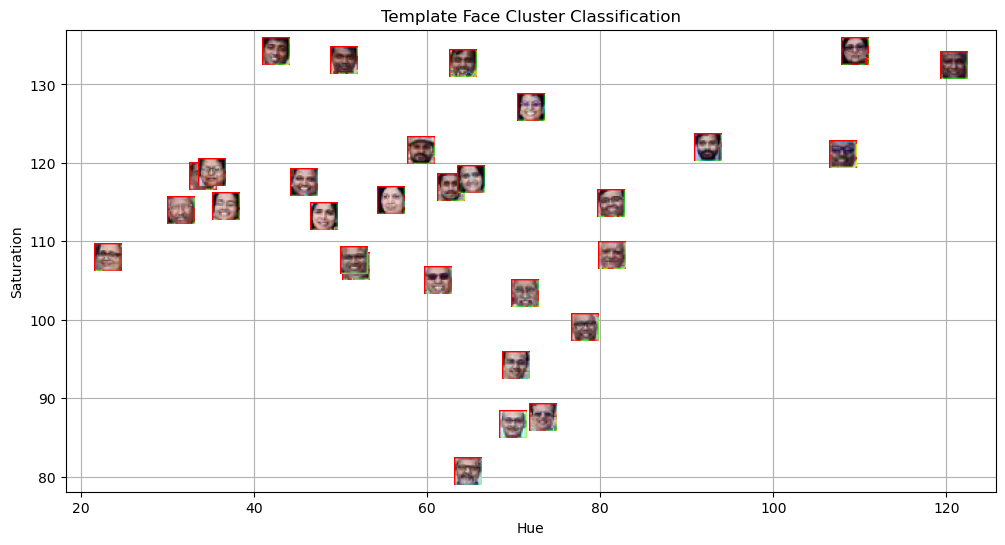

In [40]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
(x, y, w, h) = template_faces[0]
template_face = template_hsv[y:y + h, x:x + w]

template_hue = np.mean(template_face[:, :, 0])
template_saturation = np.mean(template_face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Template Face Cluster Classification")

## Add grid
plt.grid(True)

## show plot
plt.show()

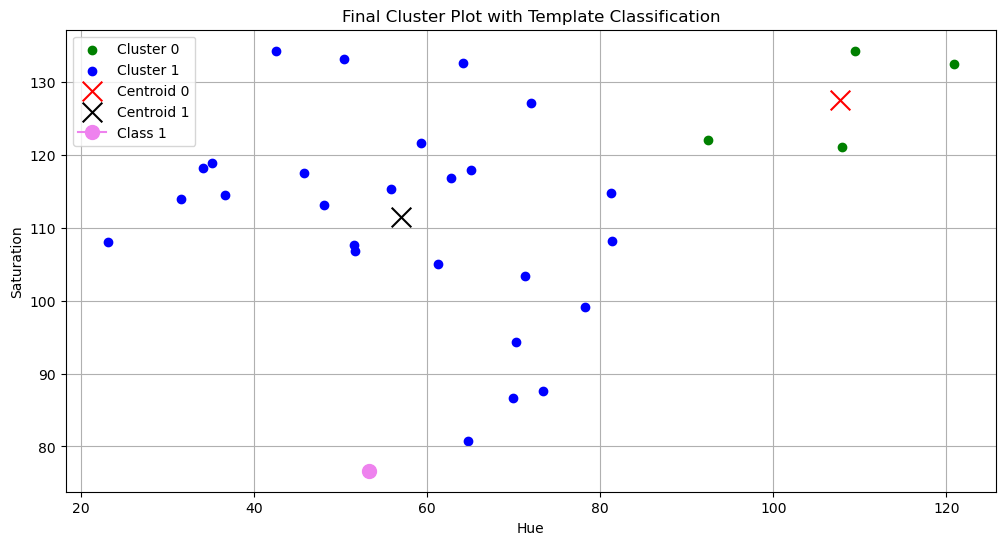

In [41]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='x', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='x', s=200, label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ' + str(template_label))

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Final Cluster Plot with Template Classification")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()

                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

In [ ]:
Common distance metrics used in distance-based classification algorithms include Euclidean distance, Manhattan distance,
Minkowski distance, Cosine distance, Hamming distance, and Mahalanobis distance. Euclidean distance measures the straight-line
distance between two points and is the most widely used for continuous numerical data. Manhattan distance calculates the sum of
absolute differences and is useful when data is grid-like or high dimensional. 
Minkowski distance is a generalized form that includes both Euclidean and Manhattan as special cases depending on the parameter value.
Cosine distance measures the angle between vectors and is commonly used for text and high-dimensional data. Hamming distance counts 
the number of differing positions and is suitable for categorical or binary data. Mahalanobis distance considers the correlation between
features and is useful when data variables are related. These metrics help determine similarity between data points, which is essential
for classification decisions.

In [ ]:
Distance-based classification algorithms are widely used in many real-world applications because they classify data based on similarity.
One common application is image and face recognition, where algorithms compare features of a new image with stored images to identify a person.
In medical diagnosis, they help classify diseases by comparing patient data such as symptoms or test results with known cases.
Recommendation systems, like those used in e-commerce and streaming platforms, use distance measures to suggest products or movies similar to
a user’s preferences. In text classification, such as spam detection, algorithms compare new emails with known spam or non-spam messages.
They are also used in pattern recognition tasks like handwriting recognition and speech recognition. Additionally, distance-based methods are
applied in fraud detection to identify unusual transactions by measuring how different they are from normal behavior. These applications rely on
measuring similarity between data points to make accurate predictions.

In [ ]:
Various distance metrics are used to measure how similar or different two data points are, and the choice of metric depends on the type of 
data and problem. Euclidean distance is the most common metric and calculates the straight-line distance between two points in space, making 
it suitable for continuous numerical data. Manhattan distance, also called city block distance, measures the sum of absolute differences 
between coordinates and is useful when movement is restricted to grid-like paths or when data has many dimensions. Minkowski distance is a
generalized form that includes both Euclidean and Manhattan distance as special cases depending on the parameter value, allowing flexibility 
in measuring distance. Cosine distance measures the angle between two vectors rather than their magnitude, making it especially useful for
text analysis and high-dimensional data where direction matters more than size. Hamming distance counts the number of positions at which
two binary or categorical values differ and is commonly used for error detection and categorical data comparison. Mahalanobis distance
considers the correlation between variables and measures distance relative to the data distribution, making it effective for detecting
outliers and working with correlated features. Together, these metrics provide different ways to quantify similarity, which is essential for 
tasks like classification, clustering, and pattern recognition.

In [ ]:
Cross validation is a technique used to evaluate how well a machine learning model will perform on unseen data and to ensure that the model
generalizes well rather than just memorizing the training data. It works by dividing the dataset into multiple subsets or “folds,” where the 
model is trained on some folds and tested on the remaining fold, and this process is repeated several times. By averaging the performance 
across all folds, cross validation provides a more reliable estimate of model accuracy compared to using a single train-test split. It helps
in detecting overfitting, where a model performs well on training data but poorly on new data, and also assists in selecting the best model 
or tuning hyperparameters. Overall, cross validation improves confidence in the model’s performance by making better use of available data 
and providing a robust evaluation method.

In [ ]:
In the context of the K-Nearest Neighbors (KNN) algorithm, bias and variance describe how the choice of the value of K affects model
behavior and prediction errors. When K is small (for example, K=1), the model closely follows the training data and captures even small
fluctuations or noise, which leads to low bias but high variance, meaning the model may overfit and perform poorly on new data. On the 
other hand, when K is large, the model averages over more neighbors, resulting in smoother decision boundaries and making the model less
sensitive to noise; this leads to high bias but low variance, meaning the model may underfit and miss important patterns. Therefore, selecting 
an appropriate value of K is important to achieve a good balance between bias and variance, ensuring the model generalizes well to unseen data
while still capturing the underlying structure of the dataset.